In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build
import isodate

In [ ]:
API_KEY = 'yourapi'  # Replace with your actual API key
REGION_CODE = 'IN'
MAX_RESULTS = 200
CSV_FILENAME = 'trending_videos.csv'


In [3]:
def get_trending_videos(api_key, region_code='IN', max_results=200):
    youtube = build('youtube', 'v3', developerKey=api_key)
    videos = []
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode=region_code,
        maxResults=50
    )
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            videos.append({
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': int(item['statistics'].get('viewCount', 0)),
                'like_count': int(item['statistics'].get('likeCount', 0)),
                'dislike_count': int(item['statistics'].get('dislikeCount', 0)),
                'favorite_count': int(item['statistics'].get('favoriteCount', 0)),
                'comment_count': int(item['statistics'].get('commentCount', 0)),
            })
        request = youtube.videos().list_next(request, response)
    return videos[:max_results]

videos = get_trending_videos(API_KEY, REGION_CODE, MAX_RESULTS)
df = pd.DataFrame(videos)
df.to_csv(CSV_FILENAME, index=False)
print(f"Trending videos saved to {CSV_FILENAME}")


Trending videos saved to trending_videos.csv


Fetched Data:
We have successfully retrieved metadata for the top 200 trending YouTube videos in India. This dataset includes titles, descriptions, channel info, statistics (views, likes, comments), and more.

Next: We will clean and format this data for analysis.

In [4]:
df = pd.read_csv(CSV_FILENAME)
df['published_at'] = pd.to_datetime(df['published_at'])
df['tags'] = df['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Pre-format view and like counts (in lakhs)
df['view_count_lakhs'] = df['view_count'] / 100000
df['like_count_lakhs'] = df['like_count'] / 100000
df['comment_count_thousands'] = df['comment_count'] / 1000

df.head()


,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,view_count_lakhs,like_count_lakhs,comment_count_thousands
0,zzRgmpIwIXI,ശിവാനിയുടെ കല്യാണപ്പന്തലിൽ ഞെട്ടിത്തരിക്കുന്ന ...,ഉപ്പും മുളകും | ഇന്ന് വൈകുന്നേരം 6.30 മണിക്ക് ...,2025-06-30 01:00:54+00:00,UC4Zgm_UaEwZqvdrzwvh_O2A,Flowers Promos,24,"[Flowers Top Singer 2 promo, promo, Flowers Pr...",PT47S,hd,False,591315,8148,0,0,483,5.91315,0.08148,0.483
1,PGeuOtwDquE,BroCode Roast Battle | S2. Ep5,"Welcome back to the world of #Roastcomedy, wit...",2025-06-28 20:13:41+00:00,UCaUr7y4F9lWGnZ0cbUZyzYA,Aashish Solanki,23,"[Aashish, Ashish solanki, asis solnaki, roast,...",PT1H27M48S,hd,True,2124256,99569,0,0,5527,21.24256,0.99569,5.527
2,ISHiW5dehfE,Watching Our Most EMBARRASSING Moment | SlayyPop,We react to our most embarrassing day on Youtu...,2025-06-29 13:30:17+00:00,UCSfxFZFzcpYMbOB3A1rWHAg,SlayyPop,20,"[slayy point, slayypop, abhyudaya, gautami, fa...",PT23M16S,hd,False,1233182,72800,0,0,2438,12.33182,0.72800,2.438
3,93t5Dl4Njgc,Vetri Maaran’s Next - World of Vadachennai,#VetriMaaran #Vadachennai #WorldOfVadachennai ...,2025-06-30 02:58:29+00:00,UCosTKZUQcYdUd_jQesw32zQ,Grass Root Film Company,24,"[Vetri Maaran, Vadachennai, World of Vadachenn...",PT8M56S,hd,False,364513,20819,0,0,769,3.64513,0.20819,0.769
4,dTjIz0TI64c,Hiding in my Relative’s HOUSE and SCARING them...,NaN,2025-06-29 07:45:06+00:00,UCBu8GHpHy9vX8ixdTb38kIQ,Pragati Verma,24,[],PT17M43S,hd,False,1135404,29500,0,0,3359,11.35404,0.29500,3.359


Descriptive Statistics:

The table above summarizes the distribution of views, likes, and comments (in lakhs/thousands).

This gives a sense of the scale and spread of engagement on trending videos.

In [5]:
df.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count,view_count_lakhs,like_count_lakhs,comment_count_thousands
count,134.000000,1.340000e+02,134.000000,134.0,134.0,134.000000,134.000000,134.000000,134.000000
mean,20.910448,2.255013e+06,68546.932836,0.0,0.0,3684.111940,22.550127,0.685469,3.684112
std,6.036808,3.776948e+06,115247.903935,0.0,0.0,10875.964088,37.769478,1.152479,10.875964
min,1.000000,6.160400e+04,425.000000,0.0,0.0,0.000000,0.616040,0.004250,0.000000
25%,22.000000,4.524498e+05,8724.250000,0.0,0.0,223.750000,4.524498,0.087243,0.223750
50%,23.000000,1.070538e+06,28012.500000,0.0,0.0,1073.000000,10.705375,0.280125,1.073000
75%,24.000000,2.442176e+06,82334.000000,0.0,0.0,2877.000000,24.421760,0.823340,2.877000
max,28.000000,2.909241e+07,899449.000000,0.0,0.0,109508.000000,290.924100,8.994490,109.508000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 134 non-null    object             
 1   title                    134 non-null    object             
 2   description              128 non-null    object             
 3   published_at             134 non-null    datetime64[ns, UTC]
 4   channel_id               134 non-null    object             
 5   channel_title            134 non-null    object             
 6   category_id              134 non-null    int64              
 7   tags                     134 non-null    object             
 8   duration                 134 non-null    object             
 9   definition               134 non-null    object             
 10  caption                  134 non-null    bool               
 11  view_count               134 non

In [7]:
df.isnull().sum()

video_id                   0
title                      0
description                6
published_at               0
channel_id                 0
channel_title              0
category_id                0
tags                       0
duration                   0
definition                 0
caption                    0
view_count                 0
like_count                 0
dislike_count              0
favorite_count             0
comment_count              0
view_count_lakhs           0
like_count_lakhs           0
comment_count_thousands    0
dtype: int64

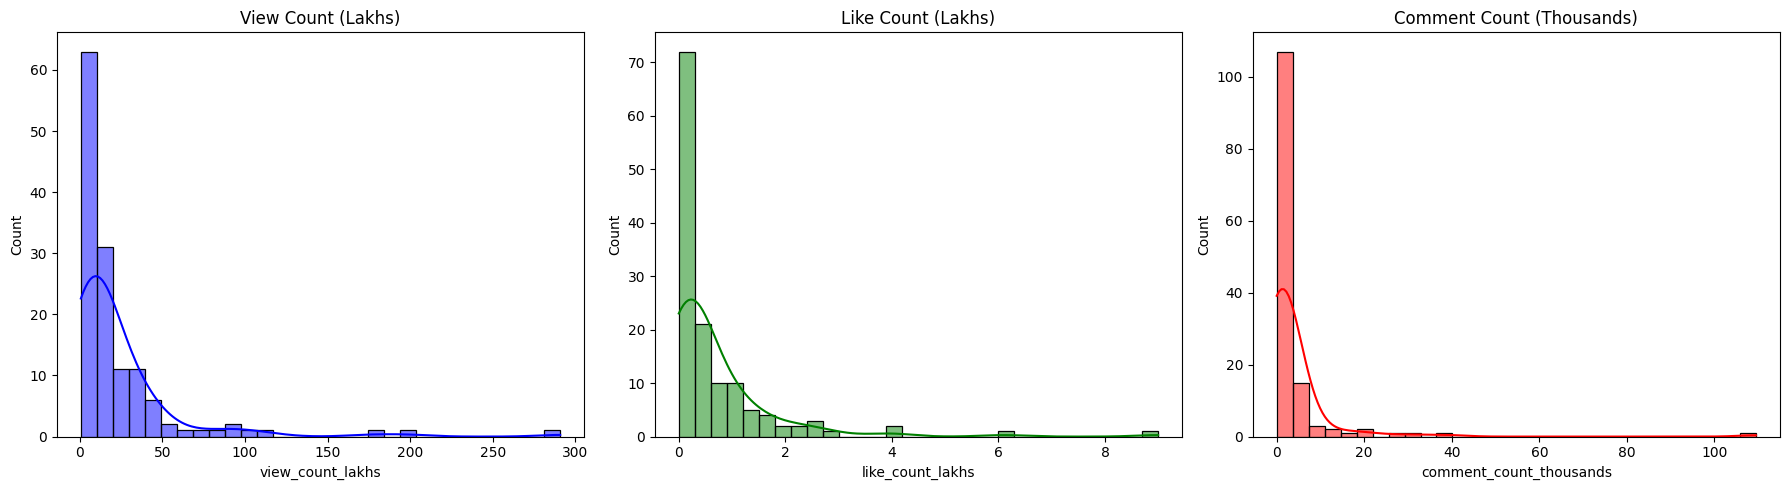

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['view_count_lakhs'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count (Lakhs)')
sns.histplot(df['like_count_lakhs'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count (Lakhs)')
sns.histplot(df['comment_count_thousands'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count (Thousands)')
plt.tight_layout()
plt.show()


Engagement Distributions:

Most trending videos have view counts clustered in the lower lakhs, with a few outliers reaching much higher.

Like and comment counts show similar right-skewed distributions, indicating a few videos dominate engagement.

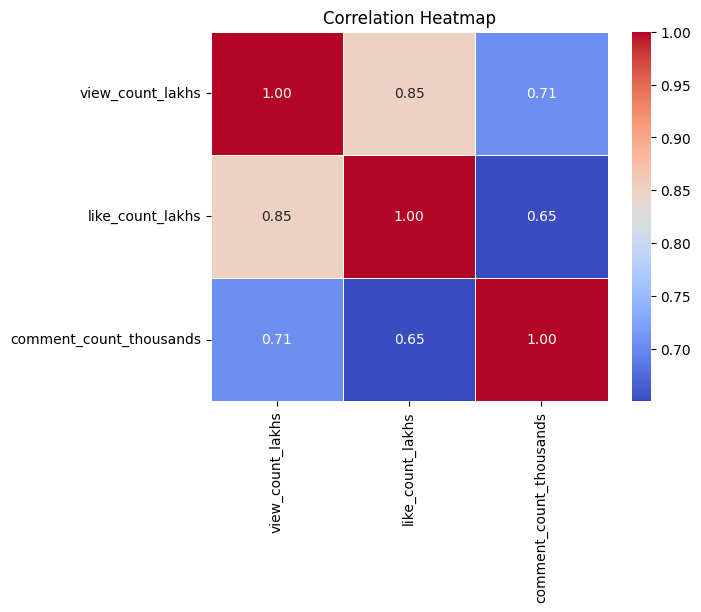

In [9]:
cor = df[['view_count_lakhs', 'like_count_lakhs', 'comment_count_thousands']].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Correlation Insights:

There is a strong positive correlation between views, likes, and comments.

This suggests that videos with more views also tend to get more likes and comments, as expected.

In [10]:
def get_category_mapping(api_key, region_code='IN'):
    youtube = build('youtube', 'v3', developerKey=api_key)
    request = youtube.videoCategories().list(part='snippet', regionCode=region_code)
    response = request.execute()
    return {item['id']: item['snippet']['title'] for item in response['items']}

category_mapping = get_category_mapping(API_KEY, REGION_CODE)
df['category_name'] = df['category_id'].astype(str).map(category_mapping)
df['category_name'].value_counts()


category_name
Entertainment           51
People & Blogs          27
Comedy                  12
Music                   12
Gaming                  10
Film & Animation         6
Education                5
Sports                   4
Science & Technology     3
News & Politics          2
Howto & Style            1
Travel & Events          1
Name: count, dtype: int64

In [12]:
df['duration_seconds'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
df['duration_range'] = pd.cut(
    df['duration_seconds'],
    bins=[0, 300, 600, 1200, 3600, 7200],
    labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min']
)
df[['duration_seconds', 'duration_range']].sample(10)


,duration_seconds,duration_range
118,1396.0,20-60 min
92,60.0,0-5 min
76,993.0,10-20 min
60,51.0,0-5 min
23,1619.0,20-60 min
17,1422.0,20-60 min
130,1112.0,10-20 min
91,107.0,0-5 min
18,220.0,0-5 min
11,276.0,0-5 min


Duration Features:

Video durations are now in seconds and grouped into common ranges (e.g., 0-5 min, 5-10 min).

This will help us analyze if shorter or longer videos perform better.

In [13]:
df['tag_count'] = df['tags'].apply(len)
df['publish_hour'] = df['published_at'].dt.hour


Additional Features:

We’ve added the number of tags per video and the hour of day each video was published.

These features can reveal how metadata and timing affect engagement.

In [14]:
category_engagement = df.groupby('category_name')[['view_count_lakhs', 'like_count_lakhs', 'comment_count_thousands']].mean().sort_values(by='view_count_lakhs', ascending=False)
category_engagement


,view_count_lakhs,like_count_lakhs,comment_count_thousands
category_name,,,
Film & Animation,59.724615,2.131688,6.814500
Music,50.689912,1.517122,18.313583
Sports,40.140305,0.798390,6.207500
Education,19.734728,0.711826,2.393600
People & Blogs,18.665266,0.694643,2.074667
Comedy,17.856384,0.366913,1.572833
Gaming,16.953624,0.507031,1.956900
Entertainment,16.840236,0.468795,1.715333
Science & Technology,12.075643,0.605593,4.509333


C:\Users\HP\AppData\Local\Temp\ipykernel_15484\2408754596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index, palette='viridis')


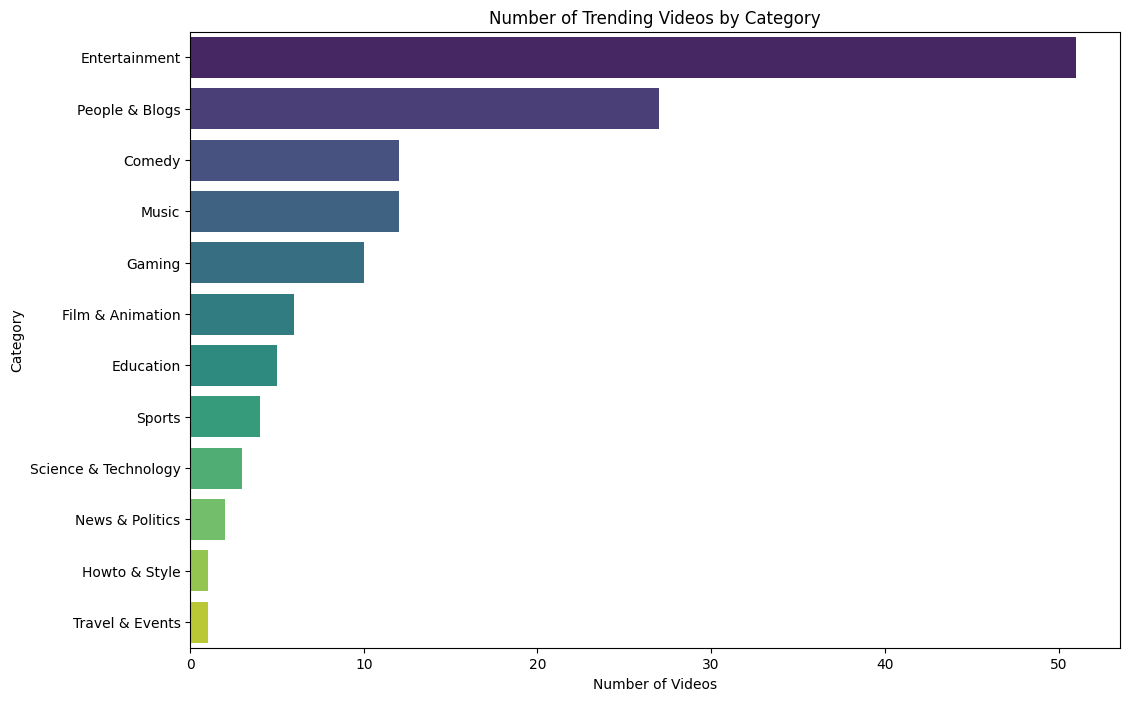

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

Engagement by Category:

The table above shows average views, likes, and comments by category.

Some categories (like Music or Entertainment) tend to have much higher engagement than others.

C:\Users\HP\AppData\Local\Temp\ipykernel_15484\1378094371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count_lakhs'], ax=axes[0], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_15484\1378094371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count_lakhs'], ax=axes[1], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_15484\1378094371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_

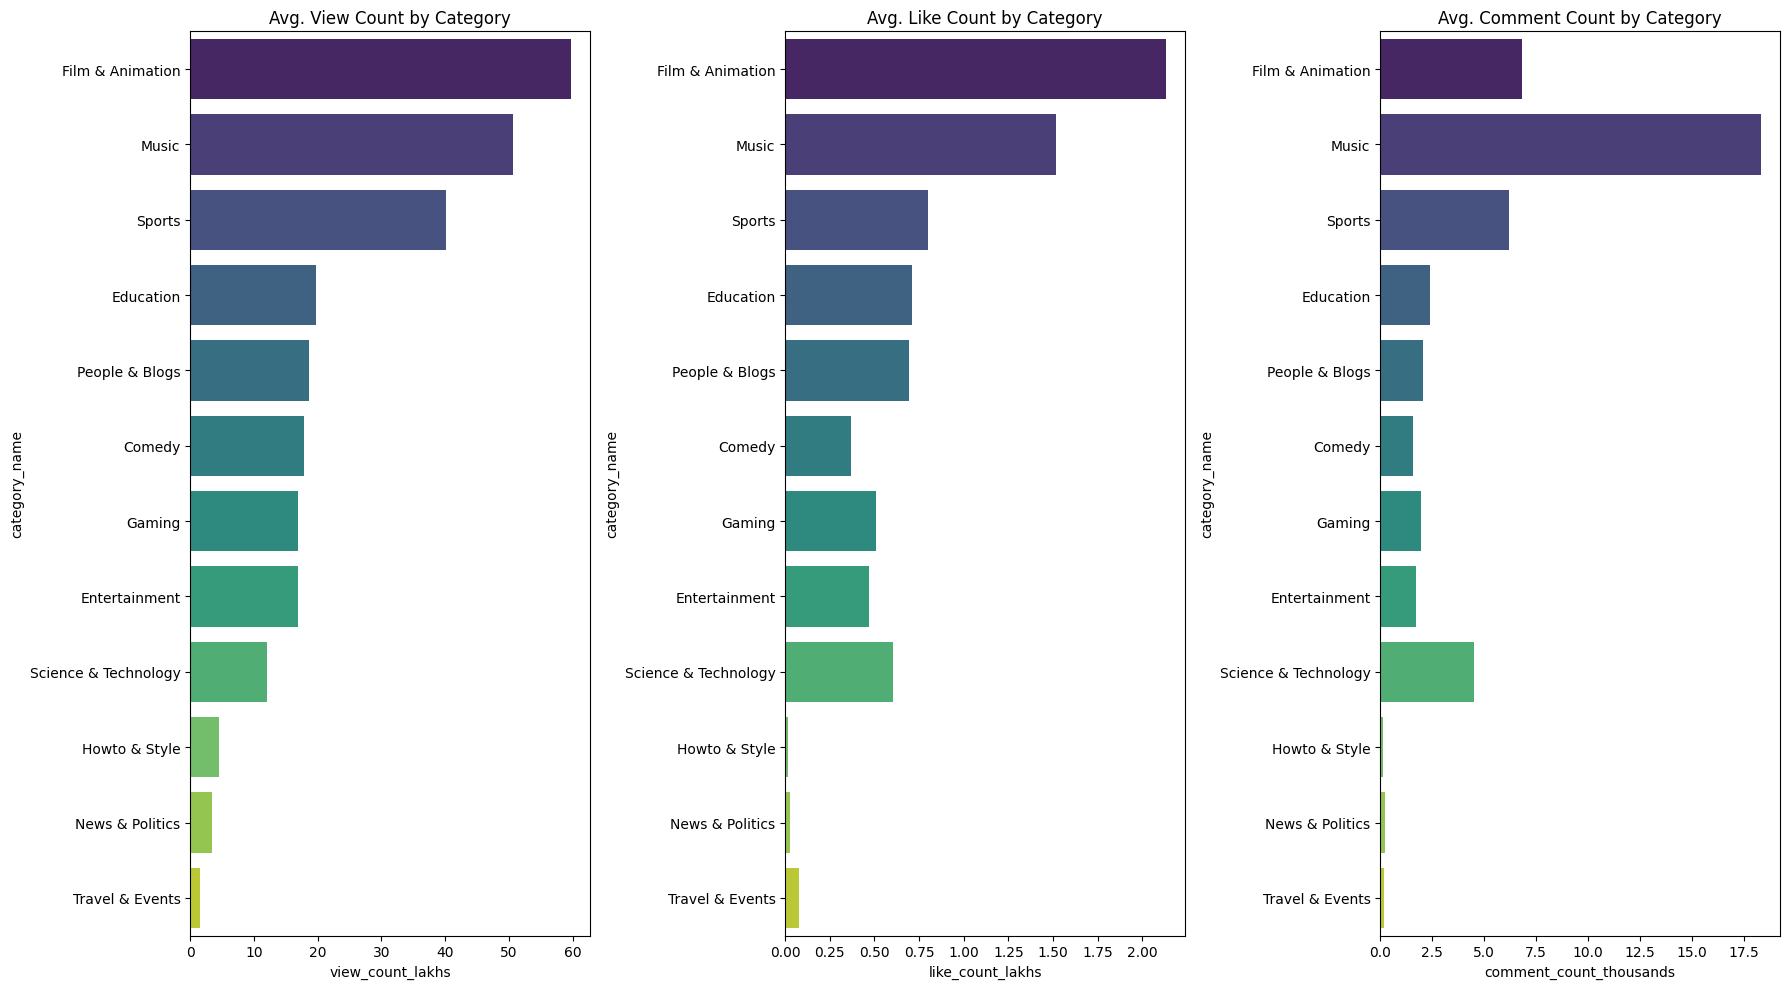

In [17]:
category_engagement = df.groupby('category_name')[['view_count_lakhs', 'like_count_lakhs', 'comment_count_thousands']].mean().sort_values(by='view_count_lakhs', ascending=False)
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.barplot(y=category_engagement.index, x=category_engagement['view_count_lakhs'], ax=axes[0], palette='viridis')
axes[0].set_title('Avg. View Count by Category')
sns.barplot(y=category_engagement.index, x=category_engagement['like_count_lakhs'], ax=axes[1], palette='viridis')
axes[1].set_title('Avg. Like Count by Category')
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count_thousands'], ax=axes[2], palette='viridis')
axes[2].set_title('Avg. Comment Count by Category')
plt.tight_layout()
plt.show()



Categories like Music and Entertainment not only trend more often but also have higher average engagement, suggesting strong audience interest.

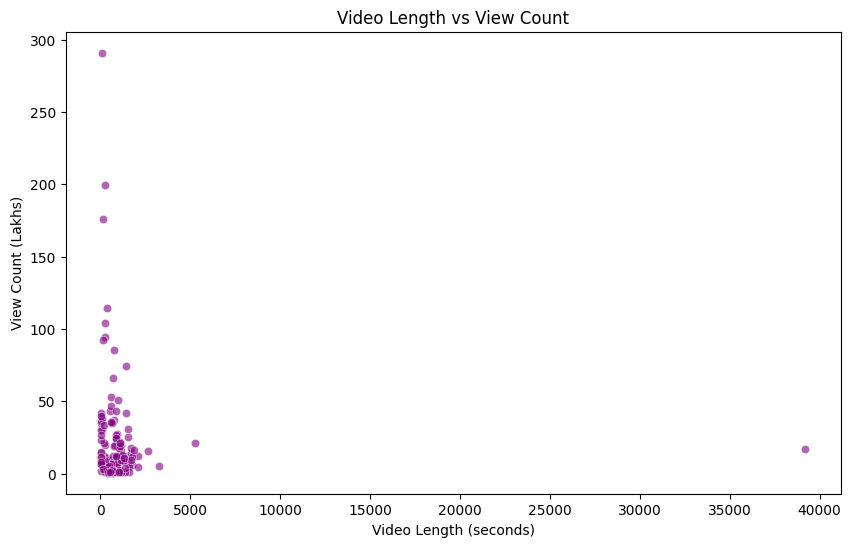

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count_lakhs', data=df, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count (Lakhs)')
plt.show()


Video Length vs. Views:
There is no strict linear relationship, but most highly viewed trending videos are under 10 minutes.

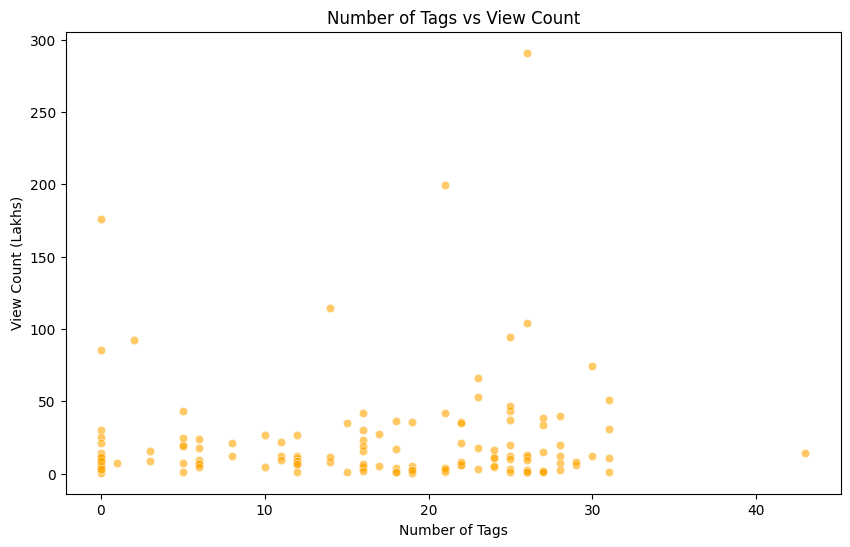

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count_lakhs', data=df, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count (Lakhs)')
plt.show()


Tags vs. Views:
The number of tags does not show a strong relationship with view count, suggesting other factors are more influential for trending.



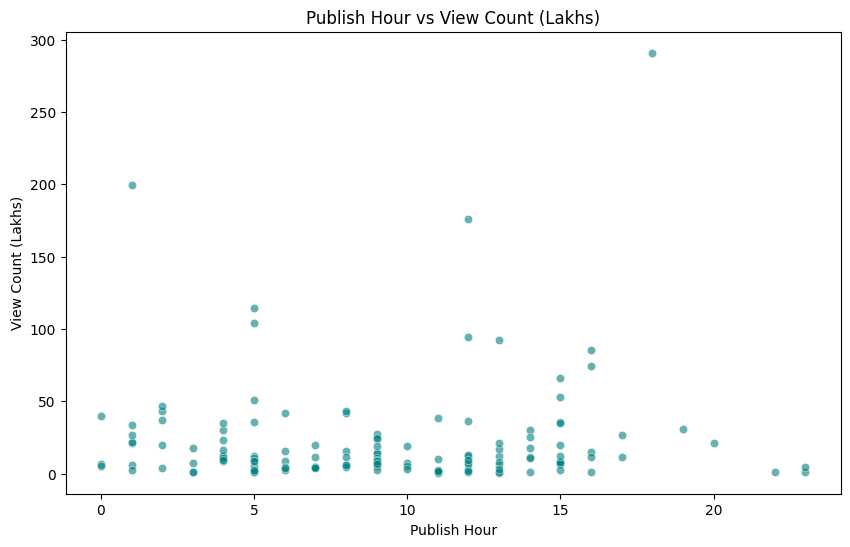

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count_lakhs', data=df, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count (Lakhs)')
plt.xlabel('Publish Hour')
plt.ylabel('View Count (Lakhs)')
plt.show()

Publish Hour vs. Views:
Some hours may have slightly higher average views, but overall, trending videos are published throughout the day.

C:\Users\HP\AppData\Local\Temp\ipykernel_15484\477092122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=df, palette='coolwarm')


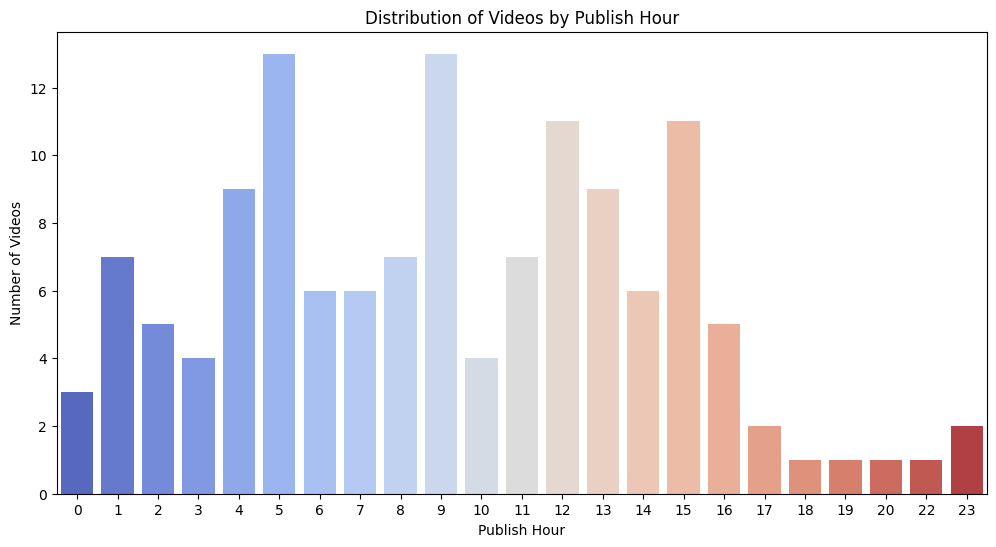

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=df, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()


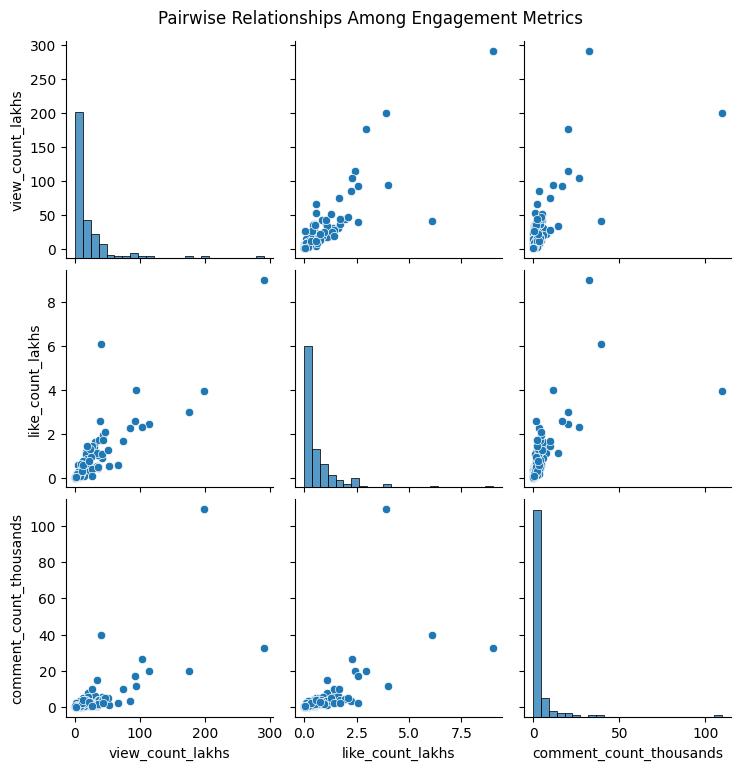

In [22]:
sns.pairplot(df[['view_count_lakhs', 'like_count_lakhs', 'comment_count_thousands']])
plt.suptitle('Pairwise Relationships Among Engagement Metrics', y=1.02)
plt.show()